In [2]:
from collections import defaultdict
import random
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from functools import partial

from mugato.data import ok_vqa

def plot_embedding(xs, ys, zs, max_x=10, max_y=10, max_z=10):
    # Create a new figure and add a 3D subplot
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    # Plot the points
    ax.scatter(xs, ys, zs, c='red', marker='o')
    
    # Set axes limits
    ax.set_xlim(0, max_x)
    ax.set_ylim(0, max_y)
    ax.set_zlim(0, max_z)
    
    # Label the axes
    ax.set_xlabel('X ("A"-ness)')
    ax.set_ylabel('Y ("vowely"-ness)')
    ax.set_zlabel('Z ("lettery"-ness)')
    
    # Display the plot
    plt.show()

%matplotlib widget

# Embeddings

Are these two phrases similar?

In [3]:
word_1 = "a lake"
word_2 = "cloudy sky"

<details>

It depends on what conceptual idea you compare them.

They are both things you might see in a painting of a landscape.

One you can live in, the other you can't.

They both have the same number of letters

One has an 'h', the other doesn't.

</details>

In [4]:
# Helper functions to get "features" of our phrases.
def count_vowels(text):
    return len([c for c in text if c in 'aeiouy'])

def count_letter(letter, text):
    return len([c for c in text if c == letter])

count_A = partial(count_letter, 'a')
count_Y = partial(count_letter, 'y')

In [5]:
def example_embedding_1(text):
    """
    Embeds the text in a 3-dimensional space.
    [            x,                y,              z]
    [number of 'a', number of vowels, length of text]
    """
    x = count_A(text)
    y = count_vowels(text)
    z = len(text)
    return x, y, z

In [6]:
example_embedding_1("a lake")

(2, 3, 6)

In [7]:
example_embedding_1("cloudy sky")

(0, 4, 10)

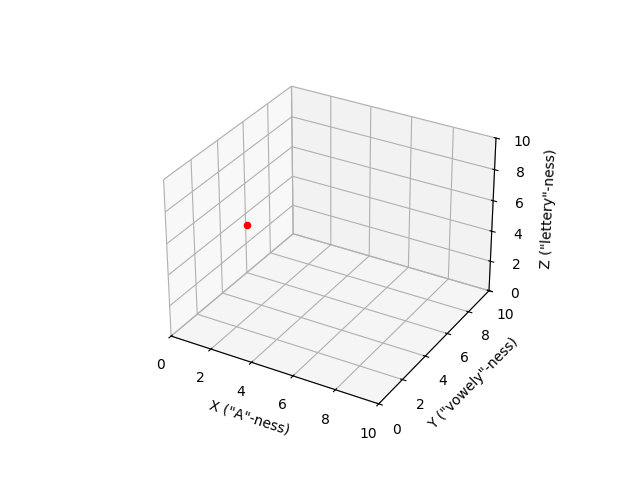

In [8]:
plot_embedding(*example_embedding_1('a lake'))

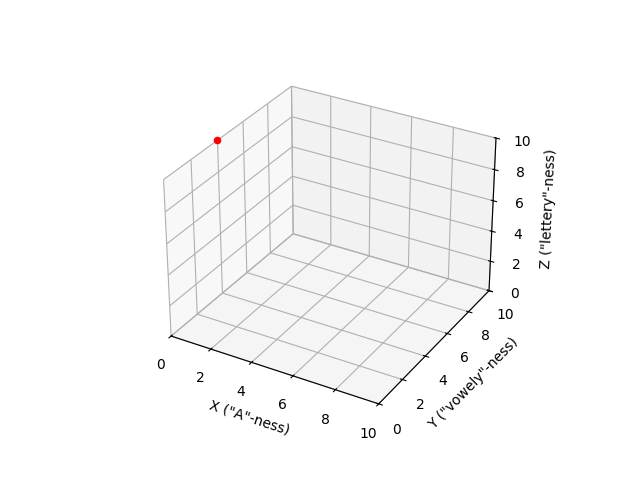

In [9]:
plot_embedding(*example_embedding_1('cloudy sky'))

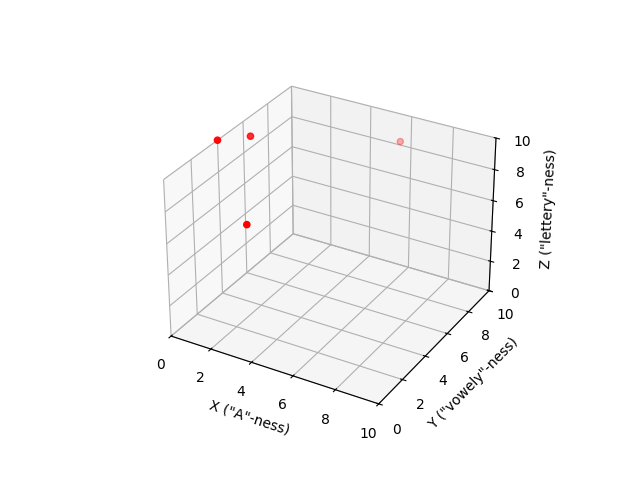

In [10]:
plot_embedding(*zip(
    example_embedding_1('a lake'),
    example_embedding_1('cloudy sky'),
    example_embedding_1('lazy mouse'),
    example_embedding_1('aaaaaayyy'),
))

In [11]:
def example_embedding_2(text):
    """
    [          x,         y,               z]
    [watery-ness, blue-ness, evaporated-ness]
    """
    embedding = {
        'a lake'    : [3, 4, 1],
        'cloudy sky': [3, 2, 5],
        'lazy mouse': [0, 1, 0],
        'aaaaaayy'  : [7, 8, 4],
    }
    if text in embedding:
        return embedding[text]
    else:
        return [2, 2, 2]

In [12]:
for text in ['a lake', 'cloudy sky', 'lazy mouse', 'aaaaaayy']:
    print(f'{text:>10}: {example_embedding_2(text)}')

    a lake: [3, 4, 1]
cloudy sky: [3, 2, 5]
lazy mouse: [0, 1, 0]
  aaaaaayy: [7, 8, 4]


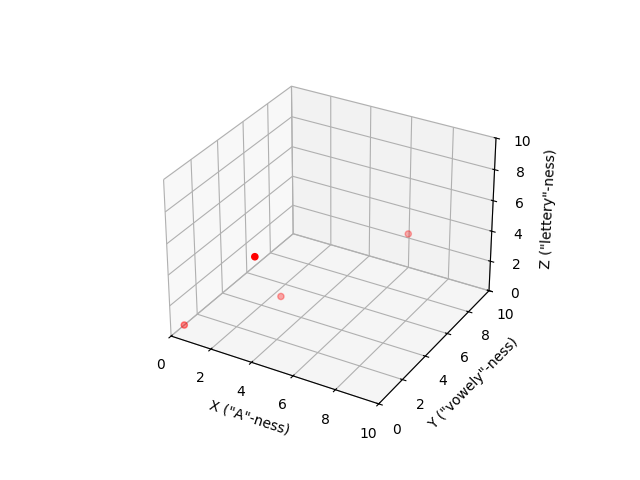

In [13]:
plot_embedding(*zip(
    *(example_embedding_2(text)
    for text in ['a lake', 'cloudy sky', 'lazy mouse', 'aaaaaayy'])
))

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
embedder = TfidfVectorizer(max_features=4, analyzer='char')
embedder.fit(['a lake', 'cloudy sky', 'lazy mouse', 'aaaaaaiy']);

In [15]:
embedder.transform(['cloudy sky']).data

array([0.40824829, 0.40824829, 0.81649658])

In [16]:
# Miscellaneous setup
r = lambda: random.randint(0, 6)
embedding = defaultdict(lambda: [2, 2, 2])
embedding['a lake']     = [r(), r(), r()]
embedding['cloudy sky'] = [r(), r(), r()]
embedding['lazy mouse'] = [r(), r(), r()]
embedding['aaaaaayy']   = [r(), r(), r()]
embedding['a']          = [r(), r(), r()]
embedding['lake']       = [r(), r(), r()]

In [17]:
def example_embedding_3(text):
    """
    Embeds the text in a 3-dimensional space.
    [  x,   y,   z]
    [???, ???, ???]
    """
    return embedding[text]

In [18]:
for text in ['a lake', 'cloudy sky', 'lazy mouse', 'aaaaaayy']:
    print(f'{text:>10}: {example_embedding_3(text)}')

    a lake: [2, 4, 6]
cloudy sky: [3, 5, 5]
lazy mouse: [4, 4, 2]
  aaaaaayy: [3, 6, 4]


How would you move the "a lake" embedding closer to the "cloudy sky" embedding?

In [19]:
example_embedding_3('a lake')

[2, 4, 6]

In [20]:
example_embedding_3('cloudy sky')

[3, 5, 5]

In [21]:
embedding['a lake'][0] += ...
embedding['cloudy sky'][1] += ...

TypeError: unsupported operand type(s) for +=: 'int' and 'ellipsis'

In [22]:
example_embedding_3('a lake'), example_embedding_3('cloudy sky')

([2, 4, 6], [3, 5, 5])

# Tokenization

In [23]:
def spaces_tokenizer(text):
    return text.split(' ')

In [24]:
spaces_tokenizer('a lake')

['a', 'lake']

In [25]:
spaces_tokenizer('aaaaaayy')

['aaaaaayy']

In [88]:
def example_tokenizer(text):
    words = text.split(' ')
    vocab = {
        'a': 0,
        'lake': 1,
        'cloudy': 2,
        'sky': 3,
        'lazy': 4,
        'mouse': 5,
        'aaaaaayy': 6,
    }
    return [
        vocab.get(word, 7)
        for word in words
    ]

In [89]:
example_tokenizer('cloudy sky')

[2, 3]

In [90]:
tiktoken_tokenizer = tiktoken.get_encoding("r50k_base")

In [92]:
tiktoken_tokenizer.encode('cloudy sky')

[17721, 88, 6766]

In [97]:
print(f'{"token":>10}: {"text":>10}')

for token in tokenizer.text_tokenizer.encode("cloudy sky"):
    decoded = tokenizer.text_tokenizer.decode([token])
    print(f'{token:>10}: {decoded:>10}')

     token:       text
     17721:      cloud
        88:          y
      6766:        sky


In [95]:
print(f'{"token":>10}: {"text":>10}')

for token in tokenizer.text_tokenizer.encode("Hello, abcDEF world!"):
    decoded = tokenizer.text_tokenizer.decode([token])
    print(f'{token:>10}: {decoded:>10}')

     token:       text
     15496:      Hello
        11:          ,
       450:         ab
        66:          c
     32988:        DEF
       995:      world
         0:          !


In [26]:
tokens = spaces_tokenizer('a lake')
embeddings = [
    example_embedding_3(token) for token in tokens
]
embeddings

[[1, 4, 0], [2, 5, 5]]

In [27]:
tokens = spaces_tokenizer('aaaaaayy')
embeddings = [
    example_embedding_3(token) for token in tokens
]
embeddings

[[3, 6, 4]]

## Tokenizing images

In [35]:
import tiktoken
from mugato.tokenizer import Tokenizer

In [67]:
vqa_dataset = ok_vqa.initialize()

In [75]:
sample_index = 10
sample = vqa_dataset['train'][sample_index]

In [77]:
sample['question']

'Which breed of dog it this?'

In [82]:
spaces_tokenizer(sample['question'])

['Which', 'breed', 'of', 'dog', 'it', 'this?']

In [84]:
tokenizer.encode_text(sample['question'])

tensor([[13828],
        [15939],
        [  286],
        [ 3290],
        [  340],
        [  428],
        [   30]])

In [80]:
sample['answers'][0]

{'answer': 'doberman',
 'raw_answer': 'doberman',
 'answer_confidence': 'yes',
 'answer_id': 1}

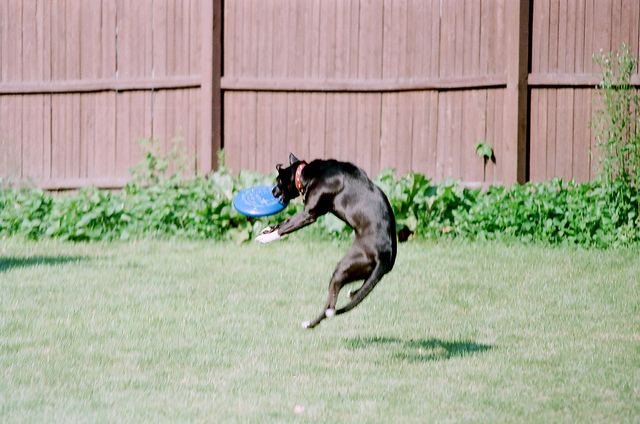

In [81]:
sample['image']

In [62]:
text_tokenizer = tiktoken.get_encoding("r50k_base")
tokenizer = Tokenizer(text_tokenizer)
vqa_dataloader = ok_vqa.create_dataloader(tokenizer, batch_size=4)
dlit = iter(vqa_dataloader);
next(dlit); next(dlit);

In [63]:
batch = next(dlit)

In [64]:
xs, ys, ms = batch

In [65]:
xs['question'][0]

tensor([[[ 5195],
         [  318],
         [  428],
         [  281],
         [  379],
         [ 4464],
         [  605],
         [  804],
         [  329],
         [ 2130],
         [ 5762],
         [  428],
         [16029],
         [   30],
         [    0],
         [    0],
         [    0],
         [    0],
         [    0],
         [    0],
         [    0]]])

In [66]:
tokenizer.decode_text(xs['question'][0].squeeze())

'Why is this an atypical look for someone wearing this makeup?!!!!!!!'

In [50]:
xs['answer'][0]

tensor([[[50256],
         [   79],
         [ 1647],
         [ 7894]]])

In [42]:
xs['question']

tensor([[[[ 2061],
          [  318],
          [  262],
          [42658],
          [ 2349],
          [  286],
          [  262],
          [32749],
          [ 1444],
          [   30],
          [    0],
          [    0],
          [    0],
          [    0]]],


        [[[ 2437],
          [ 1468],
          [  466],
          [  345],
          [  423],
          [  284],
          [  307],
          [  287],
          [  460],
          [ 4763],
          [  284],
          [  466],
          [  428],
          [   30]]],


        [[[ 6090],
          [  345],
          [ 4724],
          [  262],
          [ 1295],
          [  810],
          [  262],
          [  582],
          [  318],
          [ 2712],
          [   30],
          [    0],
          [    0],
          [    0]]],


        [[[13828],
          [ 6787],
          [ 1664],
          [  318],
          [ 3706],
          [  706],
          [  257],
          [ 3240],
          [  287],
          [  649],
